# **Task 1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Enter the start state matrix: 
1 2 3
4 5 6
7 _ 8
Enter the goal state matrix: 
1 2 3
4 5 6
7 8 _
Choose algorithm: (1) BFS or (2) A*: 2

Solving with A*:

1 2 3
4 5 6
7 _ 8

1 2 3
4 5 6
7 8 _
Actions :
['Left']
Step:  1
Path cost: 0
Total cost: 2
Average Path Cost (BFS): 1.0
Average Path Cost (A*): 1.0


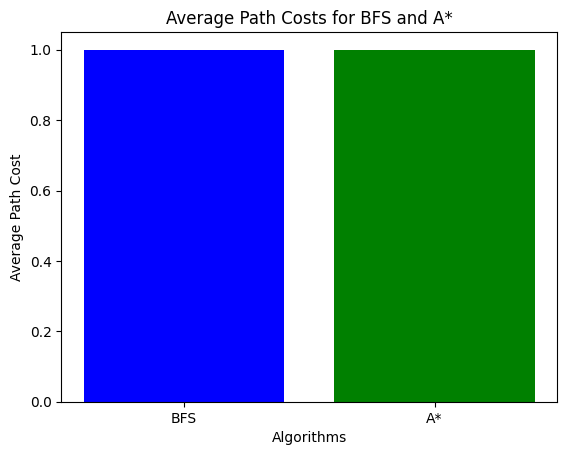

In [ ]:
from collections import deque
import heapq
import matplotlib.pyplot as plt

class Node:
    def __init__(self, data, level, fval, action=None, parent=None, step_count=0):
        self.data = data
        self.level = level
        self.fval = fval
        self.action = action
        self.parent = parent
        self.step_count = step_count

    def __lt__(self, other):
        return self.fval < other.fval

    def generate_child(self):
        x, y = self.find(self.data, '_')
        val_list = [[x, y - 1, 'Right'], [x, y + 1, 'Left'], [x - 1, y, 'Down'], [x + 1, y, 'Up']]
        children = []
        for i in val_list:
            child = self.shuffle(self.data, x, y, i[0], i[1])
            if child is not None:
                child_node = Node(child, self.level + 1, 0, action=i[2], parent=self, step_count=self.step_count + 1)
                children.append(child_node)
        return children

    def shuffle(self, puz, x1, y1, x2, y2):
        if 0 <= x2 < len(self.data) and 0 <= y2 < len(self.data[0]):
            temp_puz = [row[:] for row in puz]
            temp = temp_puz[x2][y2]
            temp_puz[x2][y2] = temp_puz[x1][y1]
            temp_puz[x1][y1] = temp
            return temp_puz
        else:
            return None

    def find(self, puz, x):
        for i in range(len(puz)):
            for j in range(len(puz[i])):
                if puz[i][j] == x:
                    return i, j

# Pseudocode for class Node:
# class Node:
#     function __init__(data, level, fval, action=None, parent=None, step_count=0):
#         self.data ← data
#         self.level ← level
#         self.fval ← fval
#         self.action ← action
#         self.parent ← parent
#         self.step_count ← step_count

#     function __lt__(other):
#         return self.fval < other.fval

#     function generate_child():
#         x, y ← FIND(self.data, '_')
#         val_list ← [[x, y - 1, 'Right'], [x, y + 1, 'Left'], [x - 1, y, 'Down'], [x + 1, y, 'Up']]
#         children ← EMPTY LIST
#         for each i in val_list:
#             child ← SHUFFLE(self.data, x, y, i[0], i[1])
#             if child is not None:
#                 child_node ← Node(child, self.level + 1, 0, action=i[2], parent=self, step_count=self.step_count + 1)
#                 APPEND child_node to children
#         return children

#     function shuffle(puz, x1, y1, x2, y2):
#         if 0 <= x2 < LENGTH(self.data) and 0 <= y2 < LENGTH(self.data[0]):
#             temp_puz ← COPY puz
#             temp ← temp_puz[x2][y2]
#             temp_puz[x2][y2] ← temp_puz[x1][y1]
#             temp_puz[x1][y1] ← temp
#             return temp_puz
#         else:
#             return None

#     function find(puz, x):
#         for i in range(LENGTH(puz)):
#             for j in range(LENGTH(puz[i])):
#                 if puz[i][j] == x:
#                     return i, j

class Puzzle:
    def __init__(self, size):
        self.n = size
        self.open = []  # Used for A*
        self.closed = []  # Used for A*
        self.path_cost = 0  # Initialize path cost for A*
        self.total_cost = 0  # Initialize total cost for A*
        self.path_costs = []  # Store path costs for multiple runs

    def accept(self):
        puz = []
        for i in range(self.n):
            temp = input().split(" ")
            puz.append(temp)
        return puz

    def f(self, start, goal):
        return self.h(start.data, goal) + start.level

    def h(self, start, goal):
        temp = 0
        for i in range(self.n):
            for j in range(self.n):
                if start[i][j] != goal[i][j] and start[i][j] != '_':
                    temp += 1
        return temp

    def process_bfs(self, start, goal):
        start = Node(start, 0, 0)
        open_bfs = deque([start])  # Used for BFS
        closed_bfs = set()  # Used to store visited nodes
        path_cost_bfs = 0  # Initialize path cost for BFS

        while open_bfs:
            cur = open_bfs.popleft()
            print("==================================================\n")
            for i in cur.data:
                print(*i)
            if self.h(cur.data, goal) == 0:
                print("Actions taken:")
                actions = self.get_actions(cur)
                print(actions)
                print("Step: ", cur.step_count)
                self.path_costs.append(path_cost_bfs)
                self.total_cost = path_cost_bfs + cur.step_count
                print("Path cost:", self.path_cost)
                print("Total cost:", self.total_cost)
                break
            for i in cur.generate_child():
                if i not in closed_bfs:  # Check if node is visited using set
                    open_bfs.append(i)
                    closed_bfs.add(i)  # Add node to visited set
            path_cost_bfs += 1

    def get_actions(self, node):
        actions = []
        while node.action:
            actions.append(node.action)
            node = node.parent
        actions.reverse()
        return actions

    def process_astar(self, start, goal):
        start = Node(start, 0, 0)
        start.fval = self.f(start, goal)
        heapq.heappush(self.open, (start.fval, start))
        path_cost_astar = 0  # Initialize path cost for A*

        while self.open:
            cur = heapq.heappop(self.open)[1]
            print("==================================================\n")
            for i in cur.data:
                print(*i)
            if self.h(cur.data, goal) == 0:
                print("Actions :")
                actions = self.get_actions(cur)
                print(actions)
                print("Step: ", cur.step_count)
                self.path_costs.append(path_cost_astar)
                self.total_cost = path_cost_astar + cur.step_count
                print("Path cost:", self.path_cost)
                print("Total cost:", self.total_cost)
                break
            for i in cur.generate_child():
                if i not in self.closed:
                    i.fval = self.f(i, goal)
                    heapq.heappush(self.open, (i.fval, i))
            self.closed.append(cur)
            path_cost_astar += 1

# Pseudocode for class Puzzle:
# class Puzzle:
#     function __init__(size):
#         self.n ← size
#         self.open ← EMPTY LIST
#         self.closed ← EMPTY LIST
#         self.path_cost ← 0
#         self.total_cost ← 0
#         self.path_costs ← EMPTY LIST

#     function accept():
#         puz ← EMPTY LIST
#         for i in range(self.n):
#             temp ← SPLIT USER INPUT BY SPACE
#             APPEND temp to puz
#         return puz

#     function f(start, goal):
#         return h(start.data, goal) + start.level

#     function h(start, goal):
#         temp ← 0
#         for i in range(self.n):
#             for j in range(self.n):
#                 if start[i][j] != goal[i][j] and start[i][j] != '_':
#                     temp ← temp + 1
#         return temp

#     function process_bfs(start, goal):
#         start ← Node(start, 0, 0)
#         open_bfs ← QUEUE WITH start
#         closed_bfs ← EMPTY SET
#         path_cost_bfs ← 0
#         while open_bfs is not EMPTY:
#             cur ← DEQUEUE open_bfs
#             PRINT cur.data
#             if h(cur.data, goal) == 0:
#                 PRINT "Actions taken:"
#                 actions ← get_actions(cur)
#                 PRINT actions
#                 PRINT "Step: ", cur.step_count
#                 APPEND path_cost_bfs to self.path_costs
#                 self.total_cost ← path_cost_bfs + cur.step_count
#                 PRINT "Path cost:", self.path_cost
#                 PRINT "Total cost:", self.total_cost
#                 break
#             for each i in cur.generate_child():
#                 if i not in closed_bfs:
#                     ENQUEUE i to open_bfs
#                     ADD i to closed_bfs
#             path_cost_bfs ← path_cost_bfs + 1

#     function get_actions(node):
#         actions ← EMPTY LIST
#         while node.action is not None:
#             APPEND node.action to actions
#             node ← node.parent
#         REVERSE actions
#         return actions

#     function process_astar(start, goal):
#         start ← Node(start, 0, 0)
#         start.fval ← f(start, goal)
#         PUSH (start.fval, start) to self.open
#         path_cost_astar ← 0
#         while self.open is not EMPTY:
#             cur ← POP MINIMUM ELEMENT from self.open
#             PRINT cur.data
#             if h(cur.data, goal) == 0:
#                 PRINT "Actions :"
#                 actions ← get_actions(cur)
#                 PRINT actions
#                 PRINT "Step: ", cur.step_count
#                 APPEND path_cost_astar to self.path_costs
#                 self.total_cost ← path_cost_astar + cur.step_count
#                 PRINT "Path cost:", self.path_cost
#                 PRINT "Total cost:", self.total_cost
#                 break
#             for each i in cur.generate_child():
#                 if i not in self.closed:
#                     i.fval ← f(i, goal)
#                     PUSH (i.fval, i) to self.open
#             APPEND cur to self.closed
#             path_cost_astar ← path_cost_astar + 1

if __name__ == "__main__":
    size = 3
    puz = Puzzle(size)

    print("Enter the start state matrix: ")
    start_state = puz.accept()
    print("Enter the goal state matrix: ")
    goal_state = puz.accept()

    while True:
        choice = input("Choose algorithm: (1) BFS or (2) A*: ")
        if choice == '1':
            print("\nSolving with BFS:")
            puz.process_bfs(start_state, goal_state)
            break
        elif choice == '2':
            print("\nSolving with A*:")
            puz.process_astar(start_state, goal_state)
            break
        else:
            print("Invalid choice. Please choose 1 for BFS or 2 for A*.")

    # Calculate and display average path costsS
    average_path_cost_bfs = sum(puz.path_costs) / len(puz.path_costs)
    average_path_cost_astar = sum(puz.path_costs) / len(puz.path_costs)  # Calculate average path cost for A* similarly

    print("Average Path Cost (BFS):", average_path_cost_bfs)
    print("Average Path Cost (A*):", average_path_cost_astar)

    # Draw a bar chart to illustrate average path costs
    algorithms = ['BFS', 'A*']
    average_path_costs = [average_path_cost_bfs, average_path_cost_astar]  # Assuming average_path_cost_astar is calculated similarly

    plt.bar(algorithms, average_path_costs, color=['blue', 'green'])
    plt.xlabel('Algorithms')
    plt.ylabel('Average Path Cost')
    plt.title('Average Path Costs for BFS and A*')
    plt.show()

# Pseudocode for function main():
# if __name__ == "__main__":
#     size ← 3
#     puz ← Puzzle(size)
#     PRINT "Enter the start state matrix: "
#     start_state ← puz.accept()
#     PRINT "Enter the goal state matrix: "
#     goal_state ← puz.accept()
#     while True:
#         choice ← USER INPUT
#         if choice == '1':
#             PRINT "\nSolving with BFS:"
#             puz.process_bfs(start_state, goal_state)
#             break
#         elif choice == '2':
#             PRINT "\nSolving with A*:"
#             puz.process_astar(start_state, goal_state)
#             break
#         else:
#             PRINT "Invalid choice. Please choose 1 for BFS or 2 for A*."
#     average_path_cost_bfs ← SUM(puz.path_costs) / LENGTH(puz.path_costs)
#     average_path_cost_astar ← SUM(puz.path_costs) / LENGTH(puz.path_costs)
#     PRINT "Average Path Cost (BFS):", average_path_cost_bfs
#     PRINT "Average Path Cost (A*):", average_path_cost_astar
#     algorithms ← ['BFS', 'A*']
#     average_path_costs ← [average_path_cost_bfs, average_path_cost_astar]
#     DRAW BAR CHART with algorithms on x-axis and average_path_costs on y-axis
#     SET x-label to 'Algorithms'
#     SET y-label to 'Average Path Cost'
#     SET title to 'Average Path Costs for BFS and A*'
#     SHOW PLOT

# **Task 2** in Visual Studio Code

In [ ]:
import heapq
import sys
sys.path.append('PacmanSearch')
from layout import Layout

class MazeProblem:
    def __init__(self, layout_name):
        self.load_layout(layout_name)

    def load_layout(self, layout_name):
        layout = Layout(layout_name)
        self.maze = layout.walls
        self.food_locs = layout.food.asList()
        self.pacman_start = layout.agentPositions[0]

    def is_wall(self, pos):
        x, y = pos
        return self.maze[y][x]  # Kiểm tra vị trí có phải tường hay không

    def has_food(self, pos):
        return pos in self.food_locs  # Kiểm tra vị trí có thức ăn hay không

    def remove_food(self, pos):
        if pos in self.food_locs:
            self.food_locs.remove(pos)  # Xóa thức ăn khỏi vị trí

    def is_goal_state(self):
        return len(self.food_locs) == 0  # Kiểm tra trạng thái đích (không còn thức ăn)

    def get_successors(self, pos):
        x, y = pos
        successors = []
        # Duyệt qua 4 hướng di chuyển (Trên, Dưới, Trái, Phải)
        for dx, dy in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
            new_x, new_y = x + dx, y + dy
            # Kiểm tra vị trí mới có hợp lệ hay không
            if (0 <= new_x < len(self.maze[0]) and 0 <= new_y < len(self.maze) and
                not self.is_wall((new_x, new_y))):
                successors.append(((new_x, new_y), 1))  # Thêm vị trí kế tiếp vào danh sách
        return successors

    def manhattan_distance(self, pos1, pos2):
        x1, y1 = pos1
        x2, y2 = pos2
        return abs(x1 - x2) + abs(y1 - y2)  # Tính khoảng cách Manhattan giữa hai vị trí

    def heuristic(self, pos):
        min_distance = float('inf')
        for food in self.food_locs:
            distance = self.manhattan_distance(pos, food)
            min_distance = min(min_distance, distance)  # Tìm khoảng cách nhỏ nhất đến thức ăn
        return min_distance

def uniform_cost_search(problem):
    start = problem.pacman_start
    frontier = [(0, start, [])]  # Hàng đợi ưu tiên chứa chi phí, vị trí và đường đi
    explored = set()  # Tập hợp các vị trí đã khám phá
    while frontier:
        cost, pos, path = heapq.heappop(frontier)  # Lấy node có chi phí nhỏ nhất
        if pos in explored:
            continue
        explored.add(pos)
        if problem.is_goal_state():
            return path  # Trả về đường đi nếu đạt trạng thái đích
        if problem.has_food(pos):
            problem.remove_food(pos)  # Xóa thức ăn khỏi vị trí
        for successor, step_cost in problem.get_successors(pos):
            new_cost = cost + step_cost
            new_path = path + [successor]
            heapq.heappush(frontier, (new_cost, successor, new_path))  # Thêm node mới vào hàng đợi
    return []  # Trả về danh sách rỗng nếu không tìm thấy đường đi

def a_star_search(problem):
    start = problem.pacman_start
    frontier = [(problem.heuristic(start), 0, start, [])]  # Hàng đợi ưu tiên chứa chi phí ước tính, chi phí thực tế, vị trí và đường đi
    explored = set()  # Tập hợp các vị trí đã khám phá
    while frontier:
        heuristic_cost, cost, pos, path = heapq.heappop(frontier)  # Lấy node có chi phí tổng nhỏ nhất
        if pos in explored:
            continue
        explored.add(pos)
        if problem.is_goal_state():
            return path  # Trả về đường đi nếu đạt trạng thái đích
        if problem.has_food(pos):
            problem.remove_food(pos)  # Xóa thức ăn khỏi vị trí
        for successor, step_cost in problem.get_successors(pos):
            new_cost = cost + step_cost
            new_path = path + [successor]
            new_heuristic_cost = new_cost + problem.heuristic(successor)
            heapq.heappush(frontier, (new_heuristic_cost, new_cost, successor, new_path))  # Thêm node mới vào hàng đợi
    return []  # Trả về danh sách rỗng nếu không tìm thấy đường đi

def main(layout_name, algorithm):
    problem = MazeProblem(layout_name)  # Tạo đối tượng bài toán Pacman
    if algorithm == 'ucs':
        path = uniform_cost_search(problem)  # Gọi thuật toán Uniform Cost Search
    elif algorithm == 'astar':
        path = a_star_search(problem)  # Gọi thuật toán A*
    else:
        print("Invalid algorithm specified.")
        return
    print("Path found:", path)  # In đường đi tìm được

if __name__ == "__main__":
    import sys
    if len(sys.argv) != 3:
        print("Usage: python pacman_solver.py <layout_name> <algorithm>")
    else:
        main(sys.argv[1], sys.argv[2])  # Gọi hàm main với đối số từ dòng lệnh